# Netflix Movies and TV Shows

#### About this Dataset: 
Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.


#### Interesting Task Ideas

1. Understanding what content is available in different countries
2. Identifying similar content by matching text-based features
3. Network analysis of Actors / Directors and find interesting insights
4. Does Netflix has more focus on TV Shows than movies in recent years.


#### Source of Dataset : https://www.kaggle.com/datasets/nishanthkv/netflix

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud

In [2]:
# importing dataset


title = pd.read_excel("C:/Users/Naveen/Desktop/GitHub/For_practice/End_to_end_case_studies/Netflix/Project_1/Data/netflix_titles.xlsx", sheet_name="netflix_titles")
director = pd.read_excel("C:/Users/Naveen/Desktop/GitHub/For_practice/End_to_end_case_studies/Netflix/Project_1/Data/netflix_titles.xlsx", sheet_name="netflix_titles_directors")
countries = pd.read_excel("C:/Users/Naveen/Desktop/GitHub/For_practice/End_to_end_case_studies/Netflix/Project_1/Data/netflix_titles.xlsx", sheet_name="netflix_titles_countries")
cast = pd.read_excel("C:/Users/Naveen/Desktop/GitHub/For_practice/End_to_end_case_studies/Netflix/Project_1/Data/netflix_titles.xlsx", sheet_name="netflix_titles_cast")
category = pd.read_excel("C:/Users/Naveen/Desktop/GitHub/For_practice/End_to_end_case_studies/Netflix/Project_1/Data/netflix_titles.xlsx", sheet_name="netflix_titles_category")

In [3]:
title.head(2)

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0


In [4]:
cast.head(2)

,cast,show_id
0,Alan Marriott,81145628
1,Jandino Asporaat,80117401


In [5]:
director.head(2)

,director,show_id
0,Richard Finn,81145628
1,Fernando Lebrija,80125979


In [6]:
countries.head(2)

,country,show_id
0,Germany,80016401
1,South Africa,80182274


In [7]:
category.head(2)

,listed_in,show_id
0,Children & Family Movies,81145628
1,Stand-Up Comedy,80117401


### For title

In [8]:
title.info()

'''
# We need to correct data type of duration_minutes as int, date_added as datetime, release_year as int, show_id as int.
# Also show_id should not be in float but in str or object.

# duration_minutes contains too many nulls so it will not be a good idea to delete, so filling with median and also creating a missing_duration 
    column so tan we can identify later if needed.
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_minutes  4267 non-null   object 
 1   duration_seasons  1971 non-null   object 
 2   type              6235 non-null   object 
 3   title             6235 non-null   object 
 4   date_added        6223 non-null   object 
 5   release_year      6234 non-null   float64
 6   rating            6223 non-null   object 
 7   description       6233 non-null   object 
 8   show_id           6232 non-null   float64
dtypes: float64(2), object(7)
memory usage: 438.6+ KB


'\n# We need to correct data type of duration_minutes as int, date_added as datetime, release_year as int, show_id as int.\n# Also show_id should not be in float but in str or object.\n\n# duration_minutes contains too many nulls so it will not be a good idea to delete, so filling with median and also creating a missing_duration \n    column so tan we can identify later if needed.\n'

In [9]:
print(f"No. of duplicates : {title.duplicated().sum()}")

No. of duplicates : 0


In [10]:
title.dropna(how="all", inplace=True)

# Dropping rows if all values are null 

In [11]:
# There are too many nulls in "duration_minutes" and "duration_minutes".
# Analysing both nulls sepratly so that find the reason

In [12]:
# For duration_minutes
title[title.duration_minutes.isna()].head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0
5,NaN,1,TV Show,Apaches,2017-09-08 00:00:00,2016.0,TV-MA,A young journalist is forced into a life of cr...,80163890.0
8,NaN,1,TV Show,Fire Chasers,2017-09-08 00:00:00,2017.0,TV-MA,"As California's 2016 fire season rages, brave ...",80117902.0
26,NaN,1,TV Show,Castle of Stars,2018-09-07 00:00:00,2015.0,TV-14,As four couples with different lifestyles go t...,80244601.0


In [13]:
title[title.duration_minutes.isna()].isna().sum()

duration_minutes    1969
duration_seasons       0
type                   0
title                  0
date_added            10
release_year           0
rating                 2
description            0
show_id                0
dtype: int64

In [14]:
title[title.duration_minutes.isna()].type.value_counts()

# This shows that if column "duration_minutes" null then it means type is "TV Show"

type
TV Show    1969
Name: count, dtype: int64

In [15]:
# For duration_seasons

In [16]:
title[title.duration_seasons.isna()].head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0
6,110,NaN,Movie,Automata,2017-09-08 00:00:00,2014.0,R,"In a dystopian future, an insurance adjuster f...",70304989.0
7,60,NaN,Movie,Fabrizio Copano: Solo pienso en mi,2017-09-08 00:00:00,2017.0,TV-MA,Fabrizio Copano takes audience participation t...,80164077.0


In [17]:
title[title.duration_seasons.isna()].isna().sum()

duration_minutes       0
duration_seasons    4265
type                   0
title                  0
date_added             2
release_year           1
rating                 9
description            1
show_id                2
dtype: int64

In [18]:
title[title.duration_seasons.isna()].type.value_counts()

# This shows that if column "duration_seasons" null then it means type is "Movie"

type
Movie    4265
Name: count, dtype: int64

In [19]:
title.type.value_counts()

# Apart from Movie and TV Show there is one more type "1944", lets see that below

type
Movie      4265
TV Show    1969
1944          1
Name: count, dtype: int64

In [20]:
title[title.type == 1944]

# This row looks like entered by mistake as row's data type mismatched with columns data type.
# So dropping this column

title.drop(index=2018, inplace=True)

title.type.value_counts()
# Now there are only 2 types of content movie and TV Shows

type
Movie      4265
TV Show    1969
Name: count, dtype: int64

In [21]:
title.type.value_counts()

type
Movie      4265
TV Show    1969
Name: count, dtype: int64

In [22]:
'''
The nulls in columns other then "duration_seasons" and "duration_minutes" are very less in numbers so we can delete them and it won't affact our data
Apart from this i think we should seprate this data as per type
But before that we need to chnage datatype of release_year, date_added and show_id so that we dont have to change this again and aiagn
'''

'\nThe nulls in columns other then "duration_seasons" and "duration_minutes" are very less in numbers so we can delete them and it won\'t affact our data\nApart from this i think we should seprate this data as per type\nBut before that we need to chnage datatype of release_year, date_added and show_id so that we dont have to change this again and aiagn\n'

In [23]:
# The nulls in columns other then "duration_seasons" and "duration_minutes" are very less in numbers so we can delete them and it won't affact our data

title.dropna(subset=["type", "title", "date_added", "release_year", "rating", "description", "show_id"], inplace=True, how="any")

In [24]:
title.isna().sum()

# Now no nulls other then in duration_minutes and duration_seasons

duration_minutes    1957
duration_seasons    4255
type                   0
title                  0
date_added             0
release_year           0
rating                 0
description            0
show_id                0
dtype: int64

In [25]:
# But before that we need to chnage datatype of release_year, date_added and show_id so that we dont have to change this again and aiagn

title["date_added"] = pd.to_datetime(title.date_added, format="%Y-%m%d")
title["release_year"] = title.release_year.astype(int)
title["show_id"] = title.show_id.astype(int).astype("object")

title.dtypes
# Now everything looks correct

duration_minutes            object
duration_seasons            object
type                        object
title                       object
date_added          datetime64[ns]
release_year                 int64
rating                      object
description                 object
show_id                     object
dtype: object

In [26]:
# Now everything changed so i should check this data again

title.info()

# no duplicates, already checked above
# ther will be no nulls after seprating data

<class 'pandas.core.frame.DataFrame'>
Index: 6212 entries, 0 to 6224
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   duration_minutes  4255 non-null   object        
 1   duration_seasons  1957 non-null   object        
 2   type              6212 non-null   object        
 3   title             6212 non-null   object        
 4   date_added        6212 non-null   datetime64[ns]
 5   release_year      6212 non-null   int64         
 6   rating            6212 non-null   object        
 7   description       6212 non-null   object        
 8   show_id           6212 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 485.3+ KB


In [27]:
# Describing data for datetime and int for better understanding of data
title.describe()

# There is no meaningfull insight so chnaging release_year dtype as object to get insight

,date_added,release_year
count,6212,6212.000000
mean,2018-07-02 13:30:52.157115392,2013.371217
min,2008-01-01 00:00:00,1925.000000
25%,2017-10-01 00:00:00,2013.000000
50%,2018-09-30 00:00:00,2016.000000
75%,2019-06-11 06:00:00,2018.000000
max,2020-01-18 00:00:00,2020.000000
std,NaN,8.779999


In [28]:
title.release_year.astype("object").describe()

# In year 2018 highest number of movies/tvshows were relesed on netflix

count     6212
unique      72
top       2018
freq      1062
Name: release_year, dtype: int64

In [29]:
# Describing data for the str and object for better understanding of data
title.describe(include="O")

# "duration_minutes" and "duration_seasons" should be int but theraren't, will again describe them after seprating

,duration_minutes,duration_seasons,type,title,rating,description,show_id
count,4255,1957,6212,6212,6212,6212,6212
unique,185,15,2,6151,14,6204,6212
top,90,1,Movie,Tunnel,TV-MA,A surly septuagenarian gets another chance at ...,70136122
freq,111,1319,4255,3,2024,3,1


In [30]:
# Adding column "year_added"

title["year_added"] = title.date_added.dt.year

In [31]:
# Now seprating the data into "movies" and "tvshows"

movies = title.loc[title.type == "Movie", ["duration_minutes", "title", "date_added", "year_added", "release_year", 
                                          "rating", "description", "show_id"]].reset_index(drop=True)

tvshows = title.loc[title.type == "TV Show", ["duration_seasons", "title", "date_added", "year_added", "release_year", 
                                              "rating", "description", "show_id"]].reset_index(drop=True)

In [32]:
movies.head()

,duration_minutes,title,date_added,year_added,release_year,rating,description,show_id
0,90,Norm of the North: King Sized Adventure,2019-09-09,2019,2019,TV-PG,Before planning an awesome wedding for his gra...,81145628
1,94,Jandino: Whatever it Takes,2016-09-09,2016,2016,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401
2,99,#realityhigh,2017-09-08,2017,2017,TV-14,When nerdy high schooler Dani finally attracts...,80125979
3,110,Automata,2017-09-08,2017,2014,R,"In a dystopian future, an insurance adjuster f...",70304989
4,60,Fabrizio Copano: Solo pienso en mi,2017-09-08,2017,2017,TV-MA,Fabrizio Copano takes audience participation t...,80164077


In [33]:
tvshows.head()

,duration_seasons,title,date_added,year_added,release_year,rating,description,show_id
0,1,Transformers Prime,2018-09-08,2018,2013,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439
1,1,Transformers: Robots in Disguise,2018-09-08,2018,2016,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654
2,1,Apaches,2017-09-08,2017,2016,TV-MA,A young journalist is forced into a life of cr...,80163890
3,1,Fire Chasers,2017-09-08,2017,2017,TV-MA,"As California's 2016 fire season rages, brave ...",80117902
4,1,Castle of Stars,2018-09-07,2018,2015,TV-14,As four couples with different lifestyles go t...,80244601


In [34]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4255 entries, 0 to 4254
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   duration_minutes  4255 non-null   object        
 1   title             4255 non-null   object        
 2   date_added        4255 non-null   datetime64[ns]
 3   year_added        4255 non-null   int32         
 4   release_year      4255 non-null   int64         
 5   rating            4255 non-null   object        
 6   description       4255 non-null   object        
 7   show_id           4255 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(5)
memory usage: 249.4+ KB


In [35]:
tvshows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957 entries, 0 to 1956
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   duration_seasons  1957 non-null   object        
 1   title             1957 non-null   object        
 2   date_added        1957 non-null   datetime64[ns]
 3   year_added        1957 non-null   int32         
 4   release_year      1957 non-null   int64         
 5   rating            1957 non-null   object        
 6   description       1957 non-null   object        
 7   show_id           1957 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(5)
memory usage: 114.8+ KB


In [36]:
# Correctng dtype of columns "duration_seasons" and "duration_minutes"

movies["duration_minutes"] = movies.duration_minutes.astype(int)
tvshows["duration_seasons"] = tvshows.duration_seasons.astype(int)

In [37]:
tvshows.describe(include="O")

,title,rating,description,show_id
count,1957,1957,1957,1957
unique,1946,11,1957,1957
top,Life,TV-MA,A suburban mother starts selling marijuana to ...,70136122
freq,2,677,1,1


In [38]:
tvshows.describe()

,duration_seasons,date_added,year_added,release_year
count,1957.000000,1957,1957.000000,1957.00000
mean,1.761880,2018-07-01 18:24:27.961165056,2017.964231,2015.55953
min,1.000000,2008-02-04 00:00:00,2008.000000,1925.00000
25%,1.000000,2017-09-05 00:00:00,2017.000000,2015.00000
50%,1.000000,2018-10-19 00:00:00,2018.000000,2017.00000
75%,2.000000,2019-06-27 00:00:00,2019.000000,2018.00000
max,15.000000,2020-01-17 00:00:00,2020.000000,2020.00000
std,1.582599,NaN,1.205283,5.79817


In [39]:
movies.describe(include="O")

,title,rating,description,show_id
count,4255,4255,4255,4255
unique,4231,14,4247,4255
top,The Silence,TV-MA,A surly septuagenarian gets another chance at ...,80064521
freq,3,1347,3,1


In [40]:
movies.describe()

,duration_minutes,date_added,year_added,release_year
count,4255.000000,4255,4255.000000,4255.000000
mean,99.173208,2018-07-02 22:18:08.037602816,2017.995770,2012.364747
min,3.000000,2008-01-01 00:00:00,2008.000000,1942.000000
25%,86.000000,2017-10-03 00:00:00,2017.000000,2012.000000
50%,98.000000,2018-09-14 00:00:00,2018.000000,2016.000000
75%,115.000000,2019-06-04 12:00:00,2019.000000,2017.000000
max,312.000000,2020-01-18 00:00:00,2020.000000,2020.000000
std,28.047928,NaN,1.202951,9.689053


### For director

In [41]:
director.head()

,director,show_id
0,Richard Finn,81145628
1,Fernando Lebrija,80125979
2,Gabe Ibáñez,70304989
3,Rodrigo Toro,80164077
4,Henrik Ruben Genz,70304990


In [42]:
director.info()
# Show_id should be as "object"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4852 entries, 0 to 4851
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   director  4852 non-null   object
 1   show_id   4852 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 75.9+ KB


In [43]:
print("No.of duplicates : ", director.duplicated().sum())

# Dropping the duplicate
director.drop_duplicates(inplace=True)

No.of duplicates :  1


In [44]:
print("No. of nulls : ", director.isna().sum())

# No nulls availabe

No. of nulls :  director    0
show_id     0
dtype: int64


In [45]:
# Show_id should be as "object"

director["show_id"] = director.show_id.astype("object")

In [46]:
director.describe()

,director,show_id
count,4851,4851
unique,3655,4265
top,Jan Suter,80062011
freq,21,13


### For countries

In [47]:
countries.head()

,country,show_id
0,Germany,80016401
1,South Africa,80182274
2,United States,80182274
3,United States,81145628
4,United Kingdom,80117401


In [48]:
countries.info()

# There is no null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7179 entries, 0 to 7178
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  7179 non-null   object
 1   show_id  7179 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 112.3+ KB


In [49]:
print("No.of duplicates : ", countries.duplicated().sum())
# No duplicates found

No.of duplicates :  0


In [50]:
# Correcting dtype of show_id

countries["show_id"] = countries.show_id.astype("object")

In [51]:
countries.describe()

,country,show_id
count,7179,7179
unique,113,5758
top,United States,80182274
freq,2609,12


### For cast

In [52]:
cast.head()

,cast,show_id
0,Alan Marriott,81145628
1,Jandino Asporaat,80117401
2,Peter Cullen,70234439
3,Will Friedle,80058654
4,Nesta Cooper,80125979


In [53]:
cast.info()
# No nulls availabe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44311 entries, 0 to 44310
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cast     44311 non-null  object
 1   show_id  44311 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 692.5+ KB


In [54]:
print("No.of duplicates : ", cast.duplicated().sum())

# Dropping the duplicate
cast.drop_duplicates(inplace=True)

No.of duplicates :  1


In [55]:
# Correctning the datatype "show_id"

cast["show_id"] = cast.show_id.astype("object")

In [56]:
cast.describe()

,cast,show_id
count,44310,44310
unique,27405,5664
top,Anupam Kher,70264888
freq,33,50


### For category

In [57]:
category.head()

,listed_in,show_id
0,Children & Family Movies,81145628
1,Stand-Up Comedy,80117401
2,Kids' TV,70234439
3,Kids' TV,80058654
4,Comedies,80125979


In [58]:
category.info()
# No nulls availabe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13670 entries, 0 to 13669
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   listed_in  13670 non-null  object
 1   show_id    13670 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 213.7+ KB


In [59]:
print("No.of duplicates : ", category.duplicated().sum())

# No duplicates availabe

No.of duplicates :  0


In [60]:
# Correctning the datatype "show_id"

category["show_id"] = category.show_id.astype("object")

In [61]:
category.describe()

,listed_in,show_id
count,13670,13670
unique,42,6234
top,International Movies,70281022
freq,1927,3


In [62]:
#### ---------------------->Data cleaning completed here<----------------------

#### Distribution of Movies and Tv shows

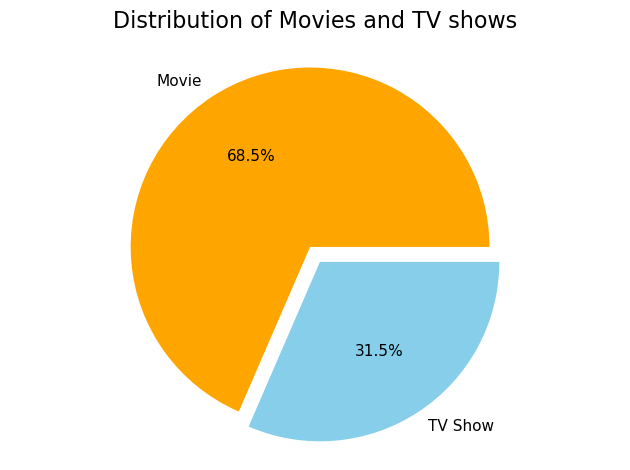

In [63]:
movie_tvshows_distribution  = title.groupby(by = ["type"]).agg({"type":"count"}).rename(columns={"type":"cnt"}).reset_index()
movie_tvshows_distribution

# Chart showing distribution of Movies and tv shows which got added to the netflix

plt.pie(x=movie_tvshows_distribution.cnt, labels=movie_tvshows_distribution.type, 
        colors=["orange", "skyblue"], 
        explode=[0,0.1], autopct="%1.1f%%",
        textprops={"fontsize":11, "color":"black"})

plt.title("Distribution of Movies and TV shows", fontsize = 16, 
          pad=15, loc="center")


plt.tight_layout()
plt.axis("equal")


plt.savefig("movie_tvshows_distribution", bbox_inches="tight")
plt.show()

#### Top 5 countries by movies/tv shows

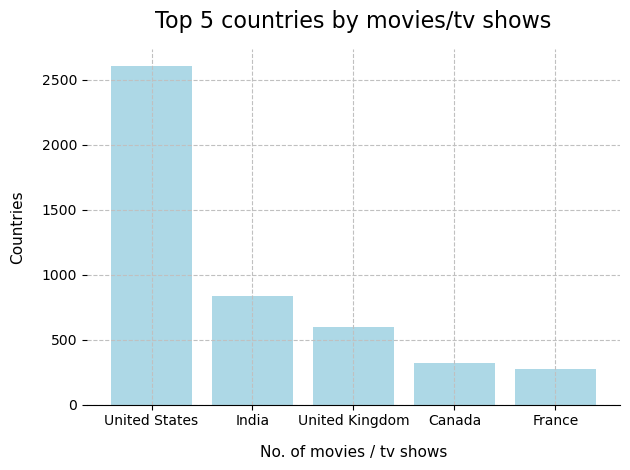

In [64]:
top_contries_by_movies_or_tvshows = countries.groupby("country").agg({"show_id"
                                                                      :"count"}).rename(columns={"show_id":
                                                                                                          "cnt_of_movies_tvshows"}).reset_index()

top_contries_by_movies_or_tvshows = top_contries_by_movies_or_tvshows.nlargest(5, "cnt_of_movies_tvshows")

plt.bar(x=top_contries_by_movies_or_tvshows.country, height=top_contries_by_movies_or_tvshows.cnt_of_movies_tvshows, 
       color ="lightblue")

plt.title(label="Top 5 countries by movies/tv shows", fontsize=16,
         pad = 15, loc= "center")
plt.ylabel(ylabel="Countries",fontsize=11, labelpad=12)
plt.xlabel(xlabel="No. of movies / tv shows", fontsize=11, labelpad=12)

plt.grid(linestyle="--", color = "silver")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig("Top_5_countries_by_movies_tv_shows", bbox_inches="tight")
plt.show()

#### Movies and tv shows comparision by the year of release

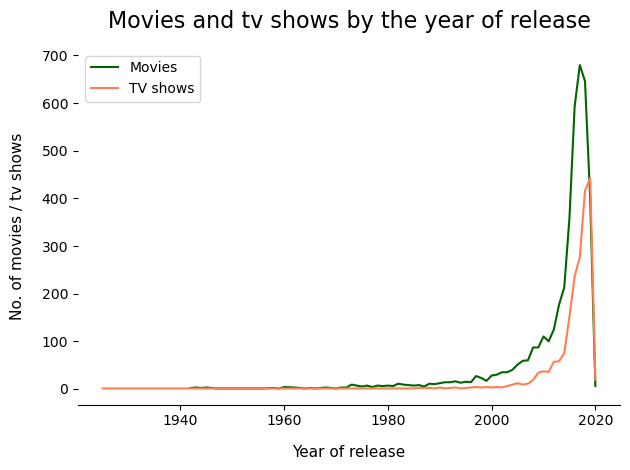

In [65]:
# Movies released by year

movies_by_released_year = movies.groupby(by="release_year").agg({"show_id": "count"}).rename(columns={"show_id":"cnt"}).reset_index()
movies_by_released_year = movies_by_released_year.sort_values(by="release_year", ascending=True)

# TV shows released by year

tvshows_by_released_year = tvshows.groupby(by="release_year").agg({"show_id": "count"}).rename(columns={"show_id":"cnt"}).reset_index()
tvshows_by_released_year = tvshows_by_released_year.sort_values(by="release_year", ascending=True)

# Chart showing Movies and tv shows by the year of release

plt.plot(movies_by_released_year.release_year, movies_by_released_year.cnt, color="darkgreen", label="Movies")
plt.plot(tvshows_by_released_year.release_year, tvshows_by_released_year.cnt, color="coral", label="TV shows")



plt.title(label="Movies and tv shows by the year of release", fontsize=16,
         pad = 15, loc= "center")
plt.ylabel(ylabel="No. of movies / tv shows",fontsize=11, labelpad=12)
plt.xlabel(xlabel="Year of release", fontsize=11, labelpad=12)
# plt.grid(linestyle="--", color = "lightblue")
plt.legend()


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig("Movies_and_tv_shows_by_the_year_of_release", bbox_inches="tight")
plt.show()

#### Movies and tv shows comparision by the year of netflix release

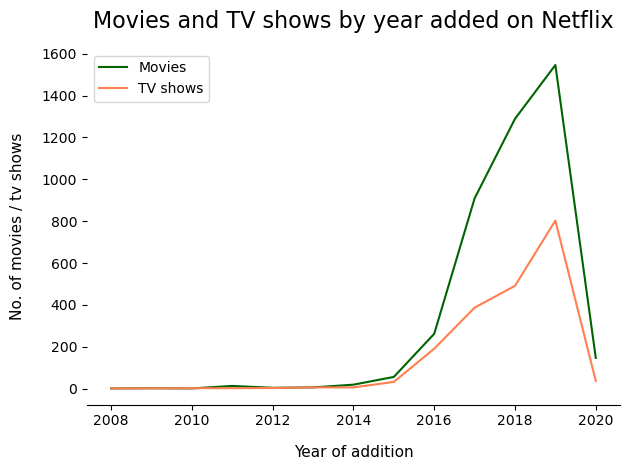

In [66]:
# Movies added by year

movies_added_by_year = movies.groupby(by="year_added").agg({"show_id":"count"}).rename(columns={"show_id":"cnt"}).reset_index()

# TV shows added by year

tv_shows_added_by_year = tvshows.groupby(by="year_added").agg({"show_id":"count"}).rename(columns={"show_id":"cnt"}).reset_index()

# Chart showing Movies and tv shows by the year it got added to netflix

plt.plot(movies_added_by_year.year_added, movies_added_by_year.cnt, color="darkgreen", label="Movies")
plt.plot(tv_shows_added_by_year.year_added, tv_shows_added_by_year.cnt, color="coral", label="TV shows")


plt.title(label="Movies and TV shows by year added on Netflix", fontsize=16,
         pad = 15, loc= "center")
plt.ylabel(ylabel="No. of movies / tv shows",fontsize=11, labelpad=12)
plt.xlabel(xlabel="Year of addition", fontsize=11, labelpad=12)
# plt.grid(linestyle="--", color = "lightblue")
plt.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig("Movies_and_TV_shows_by_year_added_on_Netflix", bbox_inches="tight")
plt.show()

#### Content Rating Distribution: Movies vs TV Shows on Netflix

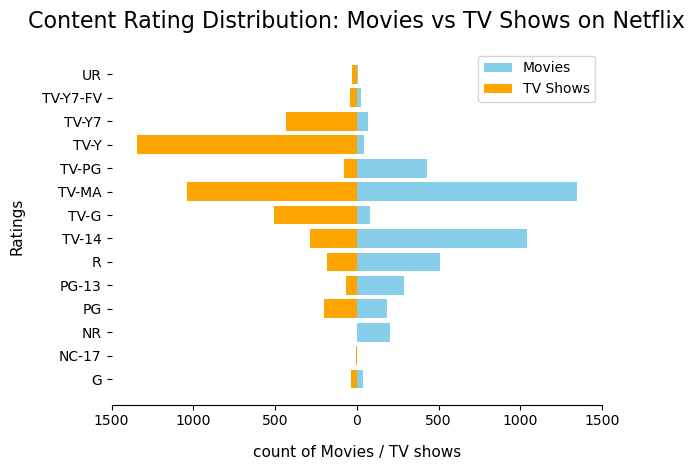

In [67]:
# All ratings 

all_ratings = title["rating"].dropna().unique()
all_rating_tab = pd.DataFrame({"rating":all_ratings, "cnt":0})

# Count of content rating wise for movies

movies_count_of_content_rating_wise = movies.groupby(by="rating").agg({"show_id":"count"}).rename(columns={"show_id":"cnt"}).reset_index()
movies_count_of_content_rating_wise = pd.concat([movies_count_of_content_rating_wise, all_rating_tab]).drop_duplicates(subset="rating",keep="first")
movies_count_of_content_rating_wise.sort_values(by="rating")


# Count of content rating wise for tv series

tvshows_count_of_content_rating_wise = tvshows.groupby(by="rating").agg({"show_id":"count"}).rename(columns={"show_id":"cnt"}).reset_index()
tvshows_count_of_content_rating_wise = pd.concat([tvshows_count_of_content_rating_wise, all_rating_tab]).drop_duplicates(subset="rating",keep="first")
tvshows_count_of_content_rating_wise.sort_values(by="rating")


# Comparing Audience Reach for Movies and Series

plt.barh(y=movies_count_of_content_rating_wise.rating, 
         width=movies_count_of_content_rating_wise.cnt, label = "Movies",
        color="skyblue")

plt.barh(y=tvshows_count_of_content_rating_wise.rating, 
         width=movies_count_of_content_rating_wise.cnt*(-1), label= "TV Shows",
        color="orange")


plt.title(label="Content Rating Distribution: Movies vs TV Shows on Netflix", fontsize=16,
         pad = 15, loc= "center")
plt.ylabel(ylabel="Ratings",fontsize=11, labelpad=12)
plt.xlabel(xlabel="count of Movies / TV shows", fontsize=11, labelpad=12)

# To get y label for TV shows in positive we need below code
ticks = plt.xticks()[0]
plt.xticks(ticks, [abs(int(t)) for t in ticks])

# plt.grid(linestyle="--", color = "lightblue", axis="x")
plt.legend()



plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)


plt.tight_layout()
plt.savefig("Content_Rating_Distribution_Movies_vs_TV_Shows_on_Netflix", bbox_inches="tight")
plt.show()

#### Top tv shows with highest number of seasons

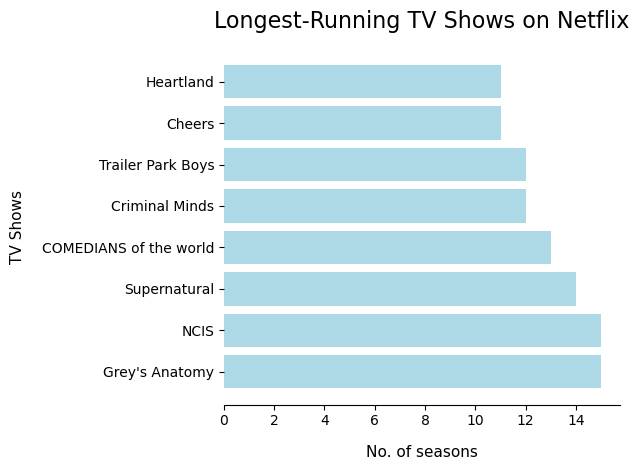

In [68]:
top_tv_shows =  tvshows.loc[tvshows.duration_seasons > 10, ["title", "duration_seasons"]].sort_values(by="duration_seasons", ascending=False)


# Chart showing Tv shows with highest number of seasons

plt.barh(top_tv_shows.title, top_tv_shows.duration_seasons, 
         color ="lightblue")


plt.title(label="Longest-Running TV Shows on Netflix", fontsize=16,
         pad = 15, loc= "center")
plt.ylabel(ylabel="TV Shows",fontsize=11, labelpad=12)
plt.xlabel(xlabel="No. of seasons", fontsize=11, labelpad=12)

# plt.grid(linestyle="--", color = "silver", axis="x")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig("Longest_Running_TV_Shows_on_Netflix", bbox_inches="tight")
plt.show()

#### Top directors

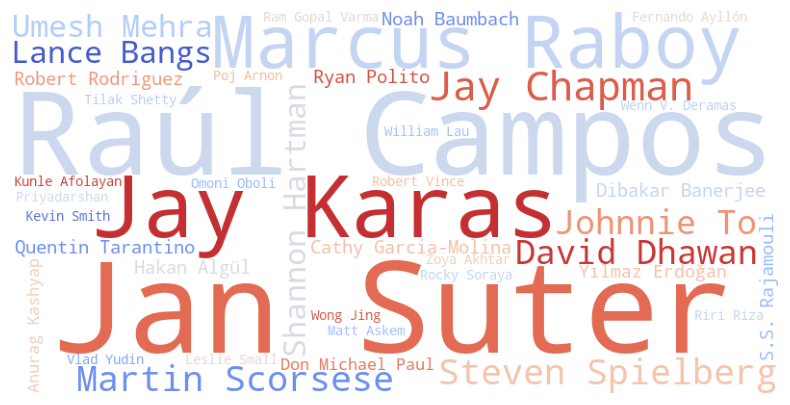

In [69]:
top_directors = pd.merge(left=title, right=director, how="inner", on="show_id").loc[:, ["director", "show_id"]]
top_directors = top_directors.groupby(by="director").agg({"show_id":"count"}).rename(columns = {"show_id":"cnt"})
top_directors = top_directors[top_directors.cnt >= top_directors.drop_duplicates(subset="cnt").nlargest(8, "cnt").sort_values(by="cnt", 
                                                                                                                              ascending=False).iloc[7, 0]]
top_directors = top_directors.reset_index()


top_directors_sorted = top_directors.sort_values(by='cnt', ascending=True)

word_freq = dict(zip(top_directors.director, top_directors.cnt))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("Top_directors", bbox_inches="tight")
plt.show()

#### Movie and Tv series category composition

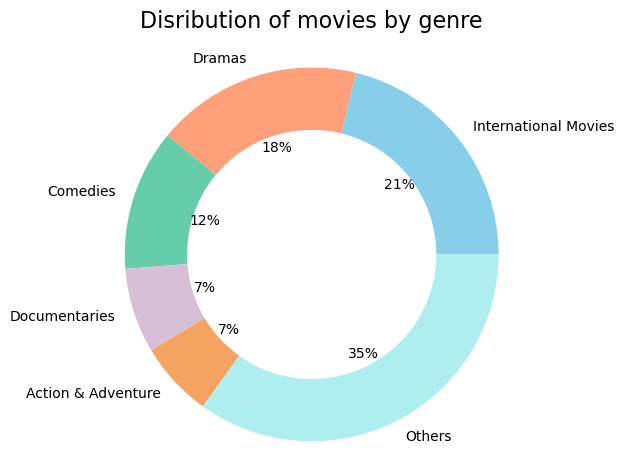

In [70]:
movie_cat = pd.merge(left=movies, right=category, on="show_id", how="inner").groupby(by="listed_in").agg({"show_id":"count"})

movie_cat = movie_cat.sort_values(by="show_id", ascending=False).reset_index()
movie_cat = movie_cat.rename(columns = {"show_id":"cnt_of_movies"})
movie_cat_main = movie_cat.head(5) # Top 5

# Creating others for movies (excluding top 5 )
others_movies =  pd.DataFrame({"listed_in":"Others", "cnt_of_movies":[movie_cat.loc[5:, ["cnt_of_movies"]].sum()[0]]})
movie_cat = pd.concat([movie_cat_main, others_movies]).reset_index(drop=True)

plt.pie(x=movie_cat.cnt_of_movies, labels=movie_cat.listed_in, 
        colors=['#87CEEB', '#FFA07A', '#66CDAA', '#D8BFD8', '#F4A460', '#AFEEEE', '#F08080'], 
        radius=0.3, wedgeprops={'width': 0.1}, autopct="%1.0f%%")

plt.title(label="Disribution of movies by genre", fontsize=16,
         pad = 15, loc= "center")

plt.axis('equal')
plt.tight_layout()
plt.savefig("Movies_category_composition", bbox_inches="tight")
plt.show()

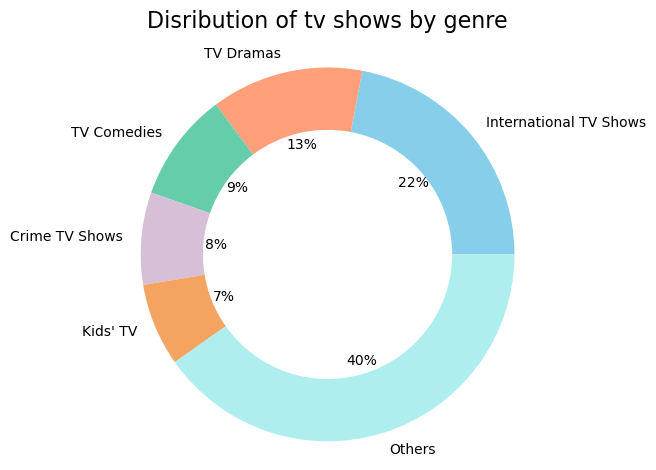

In [71]:
tv_show_cat = pd.merge(left=tvshows, right=category, on="show_id", how="inner").groupby(by="listed_in").agg({"show_id":"count"})

tv_show_cat = tv_show_cat.sort_values(by="show_id", ascending=False).reset_index()
tv_show_cat = tv_show_cat.rename(columns = {"show_id":"cnt_of_tv_series"})
tv_show_cat_main = tv_show_cat.head(5) # Top 5

# Creating others for movies (excluding top 5 )
others_tvshows =  pd.DataFrame({"listed_in":"Others", "cnt_of_tv_series":[tv_show_cat.loc[5:, ["cnt_of_tv_series"]].sum()[0]]})
tv_show_cat = pd.concat([tv_show_cat_main, others_tvshows]).reset_index(drop=True)

plt.pie(x=tv_show_cat.cnt_of_tv_series, labels=tv_show_cat.listed_in, 
        colors=['#87CEEB', '#FFA07A', '#66CDAA', '#D8BFD8', '#F4A460', '#AFEEEE', '#F08080'], 
        radius=0.3, wedgeprops={'width': 0.1}, autopct="%1.0f%%")

plt.title(label="Disribution of tv shows by genre", fontsize=16,
         pad = 15, loc= "center")

plt.axis('equal')
plt.tight_layout()
plt.savefig("Tv_shows_category_composition", bbox_inches="tight")
plt.show()

#### Disribution of Movie duration

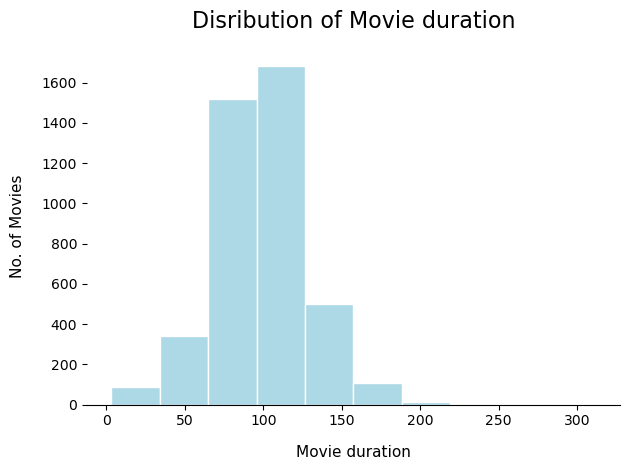

In [72]:
plt.hist(movies.duration_minutes, bins=10, edgecolor="white", color="lightblue")

plt.title(label="Disribution of Movie duration", fontsize=16,
         pad = 15, loc= "center")
plt.ylabel(ylabel="No. of Movies",fontsize=11, labelpad=12)
plt.xlabel(xlabel="Movie duration", fontsize=11, labelpad=12)
# plt.grid(linestyle="--", color = "grey", alpha=0.2)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig("Disribution_of_Movie_duration", bbox_inches="tight")
plt.show()

In [73]:
'''
To learn this again visit:
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplot2grid.html
'''

'\nTo learn this again visit:\nhttps://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplot2grid.html\n'

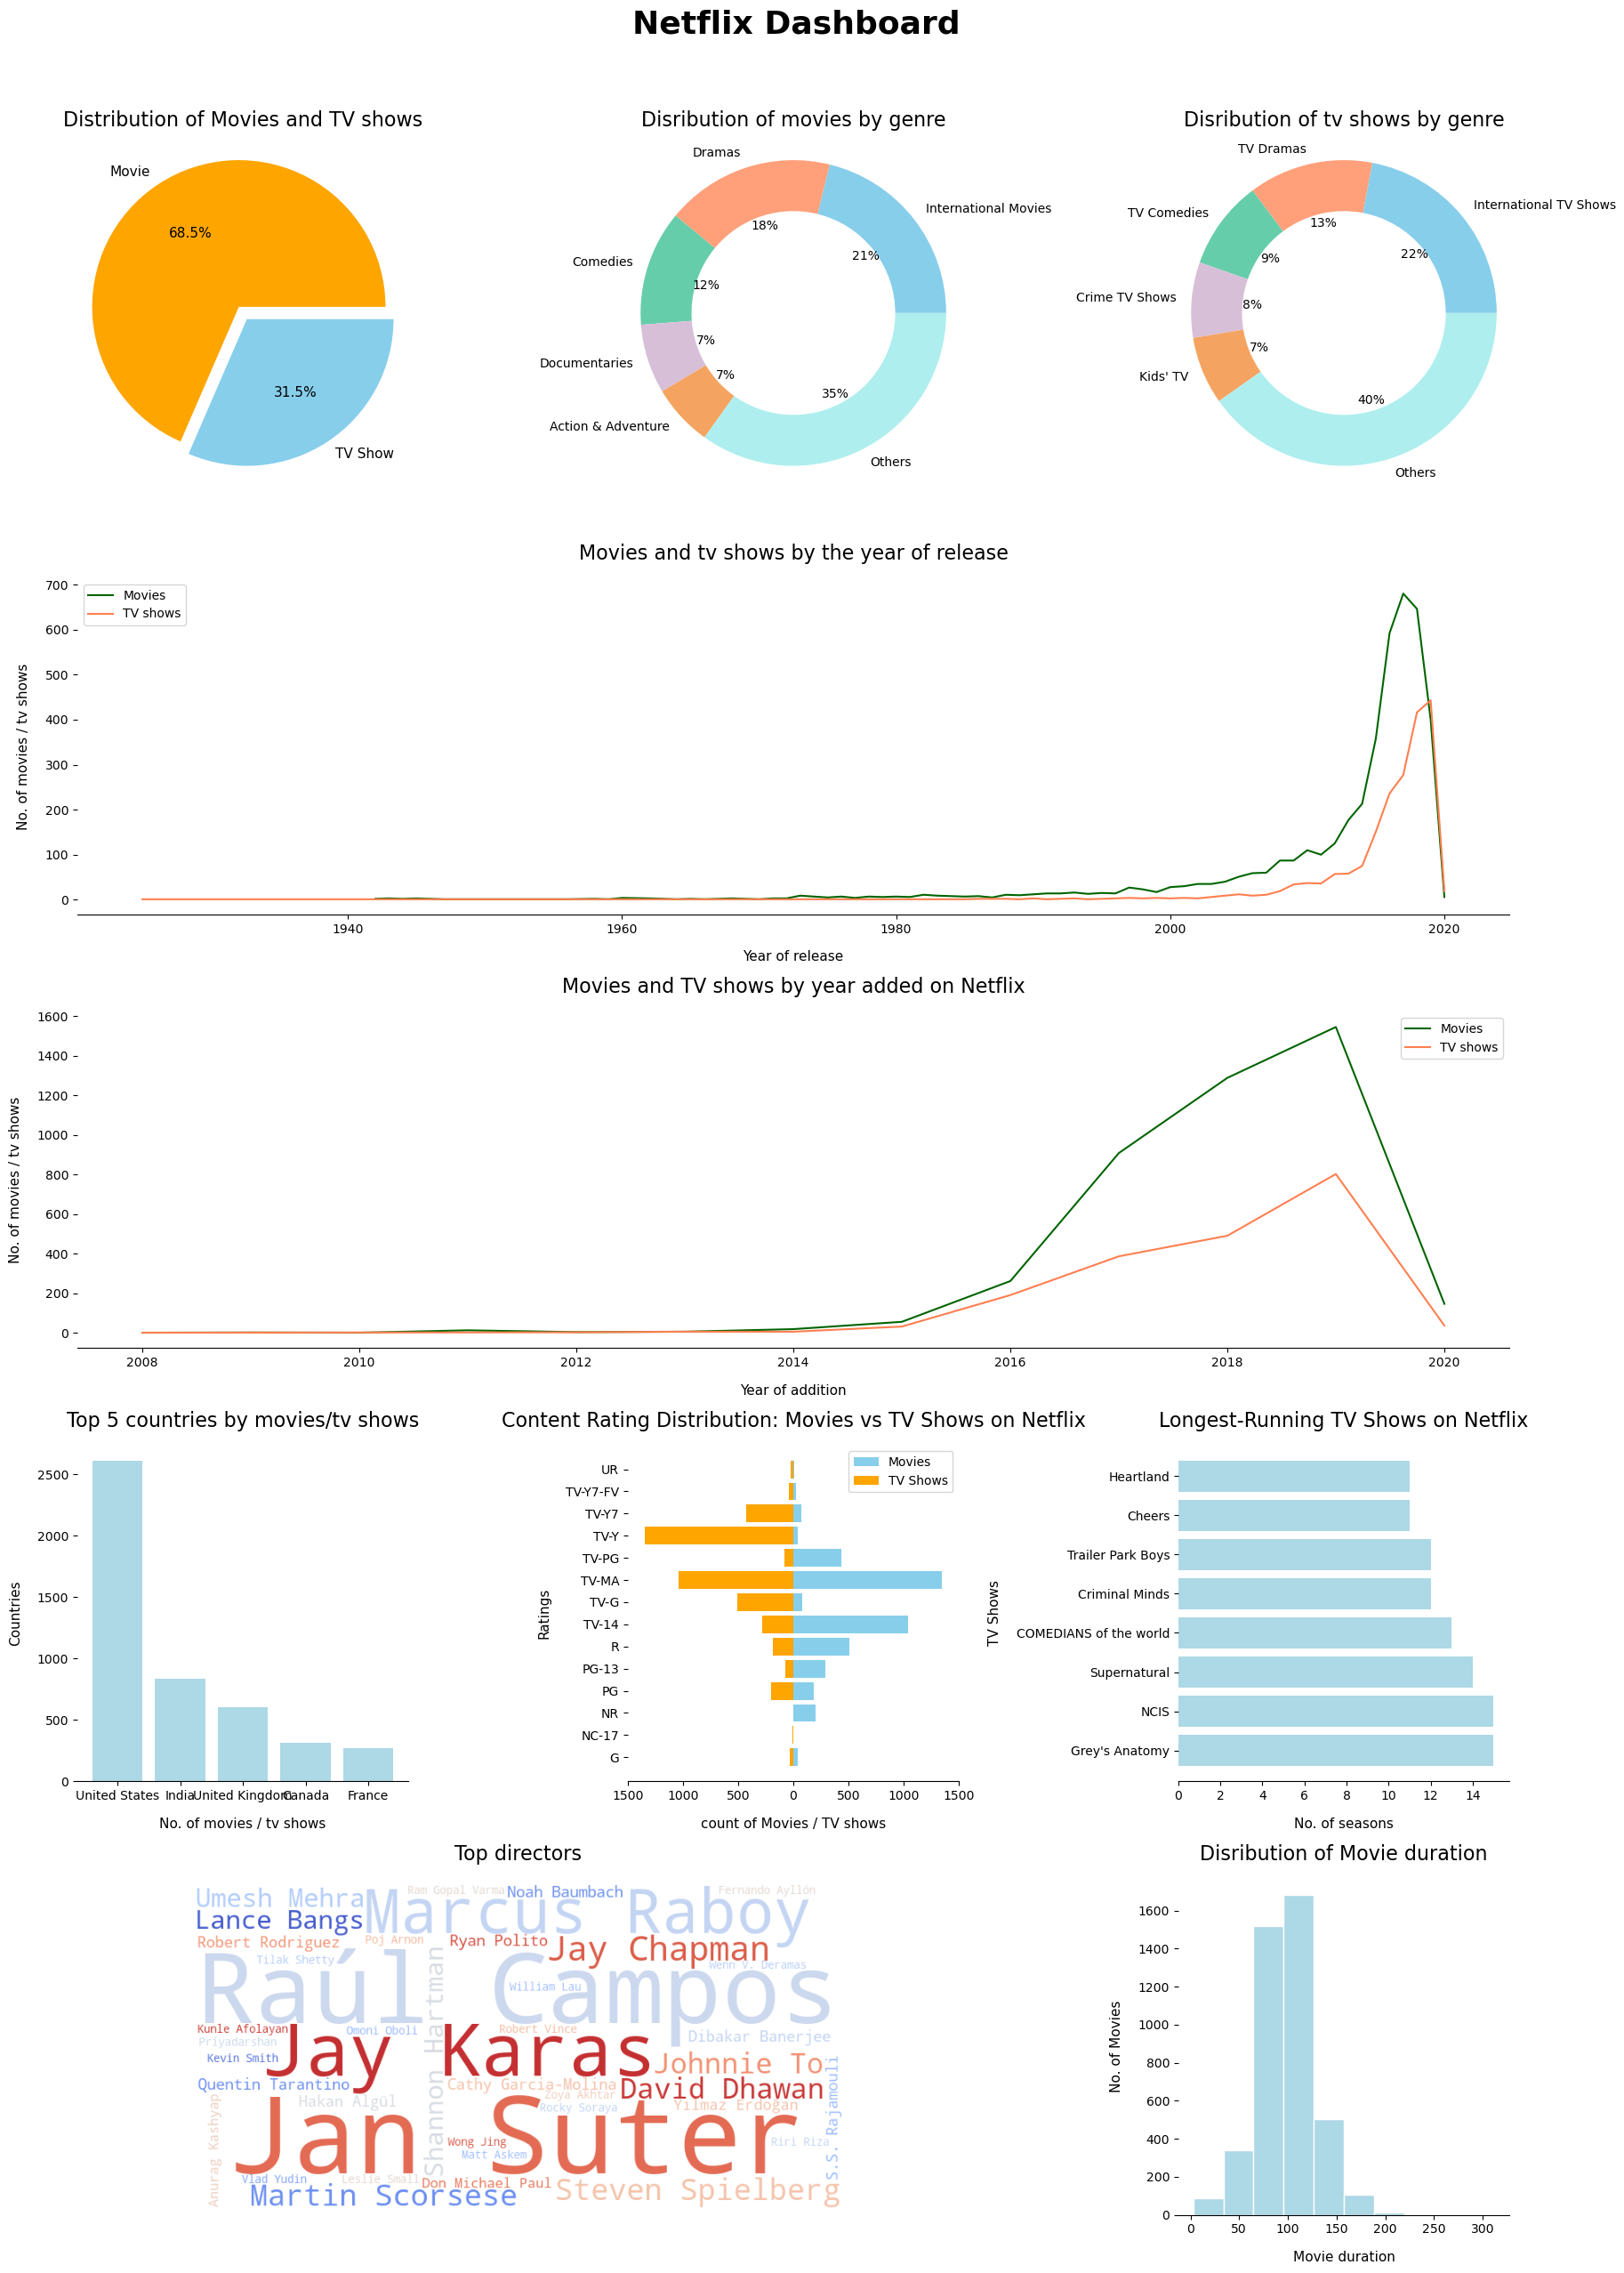

In [74]:
plt.figure(figsize=(18,25))


# Distribution of Movies and Tv shows ------------------------------------------------------------------------------------
ax1 = plt.subplot2grid((5,3), (0,0), rowspan=1, colspan=1)
ax1.pie(x=movie_tvshows_distribution.cnt, labels=movie_tvshows_distribution.type, 
        colors=["orange", "skyblue"], 
        explode=[0,0.1], autopct="%1.1f%%",
        textprops={"fontsize":11, "color":"black"})

ax1.set_title("Distribution of Movies and TV shows", fontsize = 16, 
          pad=15, loc="center")
ax1.axis("equal")


# Movies by category composition ------------------------------------------------------------------------------------
ax2 = plt.subplot2grid((5,3), (0,1), rowspan=1, colspan=1)
ax2.pie(x=movie_cat.cnt_of_movies, labels=movie_cat.listed_in, 
        colors=['#87CEEB', '#FFA07A', '#66CDAA', '#D8BFD8', '#F4A460', '#AFEEEE', '#F08080'], 
        radius=0.3, wedgeprops={'width': 0.1}, autopct="%1.0f%%")

ax2.set_title(label="Disribution of movies by genre", fontsize=16,
         pad = 15, loc= "center")
ax2.axis('equal')


# Tv shows by category composition ------------------------------------------------------------------------------------
ax3 = plt.subplot2grid((5,3), (0,2), rowspan=1, colspan=1)
ax3.pie(x=tv_show_cat.cnt_of_tv_series, labels=tv_show_cat.listed_in, 
        colors=['#87CEEB', '#FFA07A', '#66CDAA', '#D8BFD8', '#F4A460', '#AFEEEE', '#F08080'], 
        radius=0.3, wedgeprops={'width': 0.1}, autopct="%1.0f%%")

ax3.set_title(label="Disribution of tv shows by genre", fontsize=16,
         pad = 15, loc= "center")
ax3.axis('equal')


# Movies and Tv shows released over years ------------------------------------------------------------------------------------
ax4 = plt.subplot2grid((5,3), (1,0), rowspan=1, colspan=3)
ax4.plot(movies_by_released_year.release_year, movies_by_released_year.cnt, color="darkgreen", label="Movies")
ax4.plot(tvshows_by_released_year.release_year, tvshows_by_released_year.cnt, color="coral", label="TV shows")
ax4.set_title(label="Movies and tv shows by the year of release", fontsize=16,
         pad = 15, loc= "center")
ax4.set_ylabel(ylabel="No. of movies / tv shows",fontsize=11, labelpad=12)
ax4.set_xlabel(xlabel="Year of release", fontsize=11, labelpad=12)
# plt.grid(linestyle="--", color = "lightblue")
ax4.legend()
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)

# Movies and Tv shows added to netflix over years ------------------------------------------------------------------------------------
ax5 = plt.subplot2grid((5,3), (2,0), rowspan=1, colspan=3)
ax5.plot(movies_added_by_year.year_added, movies_added_by_year.cnt, color="darkgreen", label="Movies")
ax5.plot(tv_shows_added_by_year.year_added, tv_shows_added_by_year.cnt, color="coral", label="TV shows")
ax5.set_title(label="Movies and TV shows by year added on Netflix", fontsize=16,
         pad = 15, loc= "center")
ax5.set_ylabel(ylabel="No. of movies / tv shows",fontsize=11, labelpad=12)
ax5.set_xlabel(xlabel="Year of addition", fontsize=11, labelpad=12)
# plt.grid(linestyle="--", color = "lightblue")
ax5.legend()
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['left'].set_visible(False)


# Top 5 countries by Movies/Tv shows ------------------------------------------------------------------------------------
ax6 = plt.subplot2grid((5,3), (3,0), rowspan=1, colspan=1)
ax6.bar(x=top_contries_by_movies_or_tvshows.country, height=top_contries_by_movies_or_tvshows.cnt_of_movies_tvshows, 
       color ="lightblue")
ax6.set_title(label="Top 5 countries by movies/tv shows", fontsize=16,
         pad = 15, loc= "center")
ax6.set_ylabel(ylabel="Countries",fontsize=11, labelpad=12)
ax6.set_xlabel(xlabel="No. of movies / tv shows", fontsize=11, labelpad=12)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.spines['left'].set_visible(False)


# Content Rating Distribution: Movies vs TV Shows on Netflix ------------------------------------------------------------------------------------
ax7 = plt.subplot2grid((5,3), (3,1), rowspan=1, colspan=1)
ax7.barh(y=movies_count_of_content_rating_wise.rating, 
         width=movies_count_of_content_rating_wise.cnt, label = "Movies",
        color="skyblue")
ax7.barh(y=tvshows_count_of_content_rating_wise.rating, 
         width=movies_count_of_content_rating_wise.cnt*(-1), label= "TV Shows",
        color="orange")
ax7.set_title(label="Content Rating Distribution: Movies vs TV Shows on Netflix", fontsize=16,
         pad = 15, loc= "center")
ax7.set_ylabel(ylabel="Ratings",fontsize=11, labelpad=12)
ax7.set_xlabel(xlabel="count of Movies / TV shows", fontsize=11, labelpad=12)
# To get y label for TV shows in positive we need below code
ticks = ax7.get_xticks()
ax7.set_xticks(ticks)
ax7.set_xticklabels([abs(int(t)) for t in ticks])
ax7.legend()
ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax7.spines['left'].set_visible(False)


# Longest-Running TV Shows on Netflix ------------------------------------------------------------------------------------
ax8 = plt.subplot2grid((5,3), (3,2), rowspan=1, colspan=1)
ax8.barh(top_tv_shows.title, top_tv_shows.duration_seasons, 
         color ="lightblue")
ax8.set_title(label="Longest-Running TV Shows on Netflix", fontsize=16,
         pad = 15, loc= "center")
ax8.set_ylabel(ylabel="TV Shows",fontsize=11, labelpad=12)
ax8.set_xlabel(xlabel="No. of seasons", fontsize=11, labelpad=12)
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)
ax8.spines['left'].set_visible(False)


# Top directors ------------------------------------------------------------------------------------
ax9 = plt.subplot2grid((5,3), (4,0), rowspan=1, colspan=2)
ax9.imshow(wordcloud)
ax9.set_title(label="Top directors", fontsize=16,
         pad = 15, loc= "center")
ax9.axis('off')
ax9.axis('equal')


# Longest-Running TV Shows on Netflix ------------------------------------------------------------------------------------
ax10 = plt.subplot2grid((5,3), (4,2), rowspan=1, colspan=1)
ax10.hist(movies.duration_minutes, bins=10, edgecolor="white", color="lightblue")

ax10.set_title(label="Disribution of Movie duration", fontsize=16,
         pad = 15, loc= "center")
ax10.set_ylabel(ylabel="No. of Movies",fontsize=11, labelpad=12)
ax10.set_xlabel(xlabel="Movie duration", fontsize=11, labelpad=12)
ax10.spines['top'].set_visible(False)
ax10.spines['right'].set_visible(False)
ax10.spines['left'].set_visible(False)


plt.suptitle( "Netflix Dashboard", fontsize=26, fontweight="bold", y=1.02)
plt.tight_layout()
plt.savefig("Netflix Dashboard", dpi = 500, bbox_inches="tight")
plt.show()

#####

###### ------------------------------------------------------------------------------------------> Python visualization project ends here <------------------------------------------------------------------------------------------